# Case of study:

Linear Regression is one of the common models to predict certain endogenous variable with its respective exogenous variables, which is useful in statistic models and other cases related to the Supervised Learning (**ML**). This new methodology is used in order to perform a better accurancy splitting the data in train set and test set. I make an  Some famous models to work in Linear Regression are: The OLS(Basic model), Lasso Regression, Ridge Regression and Elastic Net. In that sense, in this project I am going to able to drop which of them perform a good accurancy for the data. 

The basic model is:
    $$
    Y = \beta_0 + \beta_1X1 + \beta_2X2 + ... + \beta_nXn + \epsilon       
    $$

This study is an approach to the use of Linear models which will allow the researcher to expand his knowledge and implementing other models different to basic model. For it, Its important the techniques related to the division from the dataset, for example the Cross Validation (CV). Finally, I am going to show the results depending on Mean Squared Error ${MSE}$ and the R_squared ${R^2}$ and select the best model. 

The data set contains 101 columns. The first 100, named as ${V1}$, ..., ${V100}$ collect the absorbance value for each of the 100 wavelengths analyzed (predictors), and the fat column the fat content measured by chemical techniques (response variable). Therefore, I am going to use those variables in each model I deploy. 

# Importing the main libraries:

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Loading data

In [2]:
ruta="https://raw.githubusercontent.com/HaloReach2552/Data_repository/main/Benchmark/data/meatspec.csv"

data=pd.read_csv(ruta)
data.head(4)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9


# Check the number of observations and covariates

In [3]:
#number of observations
print(f"this data set has {data.shape[0]} observations")
#number of covariates
print(f"this dataset has {data.shape[1]} covariates")

this data set has 215 observations
this dataset has 102 covariates


In [4]:
data.info()
#deleting one column called unnamed
del data["Unnamed: 0"]   #this is the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 102 entries, Unnamed: 0 to fat
dtypes: float64(101), int64(1)
memory usage: 171.5 KB


In [5]:
len(data.columns)

101

<Figure size 1008x288 with 0 Axes>

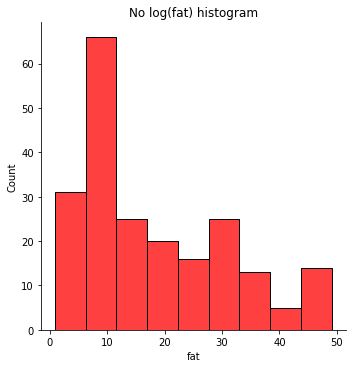

In [6]:
plt.figure(figsize=(14,4))
sns.displot(data["fat"], color="r")
plt.title("No log(fat) histogram")
plt.show()

To be honest, this distribution doesn´t follow a normal distribution which case it can make a low performance to the linear regression. 

# Applying the $log ()$ to fat variable

In [7]:
#applying the log 10 to endogenous variable which is "fat", in order to get a normal distribution 
def log(x):
    return np.log(x)

data["log_fat"]=data["fat"].apply(lambda x: log(x))
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V93,V94,V95,V96,V97,V98,V99,V100,fat,log_fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5,3.113515
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1,3.691376
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4,2.128232
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9,1.774952
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5,3.238678


<Figure size 1008x288 with 0 Axes>

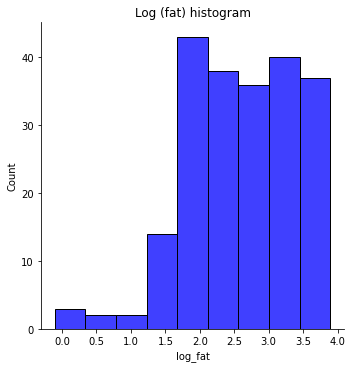

In [8]:
plt.figure(figsize=(14,4))
sns.displot(data["log_fat"], color="b")
plt.title("Log (fat) histogram")
plt.show()

Although, I decided change the **fat** variable to **Log(fat)** in order to transform the variables on normal distribution, I notice the distribution doesn´t follow a normal distribution, too. This can make some problems in order to perform a Linear Regression.

In [9]:
#exogenous variables:
x=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91',
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100']

#endogenous variable with no log method
y=["fat"]

formula_base= y

for elements in formula_base:
    form_0 = elements + " ~ "  + " + ".join(x)    #formula base

In [10]:
#displaying the formaula base
print(form_0)

fat ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + V71 + V72 + V73 + V74 + V75 + V76 + V77 + V78 + V79 + V80 + V81 + V82 + V83 + V84 + V85 + V86 + V87 + V88 + V89 + V90 + V91 + V92 + V93 + V94 + V95 + V96 + V97 + V98 + V99 + V100


In [11]:
#exogenous variables:
x=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91',
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100']

#endogenous variable with log method
y=["log_fat"]

formula_base= y

for elements in formula_base:
    form_1 = elements + " ~ "  + " + ".join(x)  #formula base 

In [12]:
#displaying the formula base
print(form_1)

log_fat ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + V71 + V72 + V73 + V74 + V75 + V76 + V77 + V78 + V79 + V80 + V81 + V82 + V83 + V84 + V85 + V86 + V87 + V88 + V89 + V90 + V91 + V92 + V93 + V94 + V95 + V96 + V97 + V98 + V99 + V100


# 1. OLS models:

In [19]:
#first using statmodels in order to build a OLS models
import statsmodels.formula.api as smf
import statsmodels.api as sm

## 1.1.Not including the Log() method to OLS model

In [20]:
model_0=smf.ols(form_0, data=data).fit()
print(model_0.summary())
# the number of paramaters
print(len(model_0.params))

                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     232.0
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          7.07e-102
Time:                        10:37:42   Log-Likelihood:                -279.71
No. Observations:                 215   AIC:                             761.4
Df Residuals:                     114   BIC:                             1102.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3017      1.876      3.892      0.0

## 1.2.Including Log() method to OLS model

In [21]:
#building a linear regression including a log to the endogenous variable
model_1=smf.ols(form_1, data=data).fit()
print(model_1.summary())
# the number of paramaters
print(f"The number of parameter are {len(model_1.params)}")

                            OLS Regression Results                            
Dep. Variable:                log_fat   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     23.88
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.70e-47
Time:                        10:37:43   Log-Likelihood:                 75.341
No. Observations:                 215   AIC:                             51.32
Df Residuals:                     114   BIC:                             391.8
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7503      0.360      2.085      0.0

In [22]:
# Assess the predictive performance
R2_1 = model_0.rsquared
print("R-squared for the basic model 1: ", R2_1, "\n")
R2_adj1 = model_0.rsquared_adj
print("adjusted R-squared for the basic model 1: ", R2_adj1, "\n")


R2_2 = model_1.rsquared
print("R-squared for the basic model 2: ", R2_2, "\n")
R2_adj2 = model_1.rsquared_adj
print("adjusted R-squared for the basic model 2: ", R2_adj2, "\n")

R-squared for the basic model 1:  0.9951112661587652 

adjusted R-squared for the basic model 1:  0.9908229031401382 

R-squared for the basic model 2:  0.9544450178632867 

adjusted R-squared for the basic model 2:  0.914484507217047 



In [23]:
# calculating the MSE
MSE1 =  np.mean(model_0.resid**2)
print("MSE for the basic model 1: ", MSE1, "\n")
p1 = len(model_0.params) # number of regressors
n = len(data)
MSE_adj1  = (n/(n-p1))*MSE1
print("adjusted MSE for the basic model 1: ", MSE_adj1, "\n")

MSE2 =  np.mean(model_1.resid**2)
print("MSE for the flexible model 2: ", MSE2, "\n")
p2 = len(model_1.params) # number of regressors
n = len(data)
MSE_adj2  = (n/(n-p2))*MSE2
print("adjusted MSE for the flexible model 2: ", MSE_adj2, "\n")

MSE for the basic model 1:  0.7898248589116633 

adjusted MSE for the basic model 1:  1.4895819707544529 

MSE for the flexible model 2:  0.029050319489163614 

adjusted MSE for the flexible model 2:  0.05478788324710682 



In [24]:
#making a table using numpy librarie
table=np.zeros((2,4))
table[0,0:4] = [R2_1,R2_adj1,MSE1,MSE_adj1]
table[1,0:4] = [R2_2,R2_adj2,MSE2,MSE_adj2]


table = pd.DataFrame(table, columns = ["$R^2_{basic}$","$R^2_{adjusted}$","$MSE_{1}$","$MSE_{adjusted}$"], \
                      index = ["first_model","log(second_model)"]

                     )
#showing the data.frame
table

,$R^2_{basic}$,$R^2_{adjusted}$,$MSE_{1}$,$MSE_{adjusted}$
first_model,0.995111,0.990823,0.789825,1.489582
log(second_model),0.954445,0.914485,0.029050,0.054788


I notice if the reseacher wants to apply a log to the endogenous variables, so it doesnt change the model, becaouse the ${R^2}$ around  0.99 and 0.95. In that sense, applying log is not the best methodololy to predict the **fat** variable. Also, the $MSE_{adjusted}$, the best model´s performance is for *log(second_model)*. Let´s chech other regressions such as : *Lasso Regression*, *Ridge Regression* and *Elastic Net* to see how they perform its respective results. Also, I didn´t use the the Machine Learning methods in this case to train and test the algorithm. Let´s do it.

## 1.3.Using Sklearn: OLS not log()

In [25]:
# In this case, I dont need the log_fat, because I am going to normalize the variables.
del data["log_fat"]
# Exogenous variables
X=data.drop(columns="fat")
# Endogenous variable
Y=data.fat

In [26]:
#splitting the data in train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=1234, shuffle=True)

In [27]:
ols_model=LinearRegression(normalize=True)
ols_model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [28]:
print(f"This is the intercept of OLS model {ols_model.intercept_}")

This is the intercept of OLS model 7.958594621019557


In [29]:
predicciones_ols = ols_model.predict(X=X_test)
predicciones_ols = predicciones_ols.flatten()
predicciones_ols[:10]

array([36.88226752, 62.47992661, 61.04825535,  9.95161352, 18.11993067,
        6.56158193, 28.42860453,  9.18085599, 15.56800749, 16.50461443])

In [30]:
rmse_ols=mean_squared_error(Y_test,predicciones_ols, squared=False)
socre_ols=ols_model.score(X_test,Y_test)
print(f"the mean squared error from OLS {rmse_ols}")
print(f"the score from OLS {socre_ols}")

the mean squared error from OLS 3.839667585676709
the score from OLS 0.918670206939467


# 3.Lasso Regression

In [31]:
#del data["log_fat"]
#X=data.drop(columns="fat")
#Y=data.fat

In [32]:
#splitting the data in train and test set
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=1234, shuffle=True) 

In [33]:
print(f"The X train set has {len(X_train)} observations")
print(f"The X test set has {len(X_test)} observations")
print(f"The Y train set has {len(Y_train)} observations")
print(f"The Y test set has {len(Y_test)} observations")

The X train set has 150 observations
The X test set has 65 observations
The Y train set has 150 observations
The Y test set has 65 observations


In [34]:
modelo_lasso=LassoCV(alphas=np.logspace(-10,3,200), 
                    normalize=True,
                    cv=10)

modelo_lasso.fit(X_train,Y_train)

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1380277516018396, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.72725557182639, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.641875321063708, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Convergen

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.9089477410374, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443.48124961902556, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454.48487619320605, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Converg

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.9528494930198, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.3292328795086, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.7406568440549, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Convergen

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.8670533864376, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.60597073082505, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.3511940741834, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Converge

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.05923903726654, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.91466763385654, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410.4921233707052, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.3803846903221, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.58320621563104, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.84531690049016, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.54009518413875, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.2702660222903, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.00423052291075, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.98383761470086, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.39970351831653, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.10695959558984, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460.85408441048696, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.07314378027337, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.7755250012531, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.6367297036292, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.1394759231408, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.66076721760885, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.96224605602055, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.7636435211508, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.57025568564126, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.176964384350867, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.888805321974814, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.79498628391275, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.74960984016315, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.79788705244755, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.92365723121304, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.0373110222279, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.8280795825403, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.62526464512433, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219.29051507978272, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250.8219926607551, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.176218134176, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.3233053481534, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.4245921486575, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.5932863153127, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.67578476943015, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.40068855272324, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.1317795961867, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438.324431658765, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447.17362968212274, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452.81908202363434, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.04214108688325, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.2523239704559, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.5222618492116, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343.8119399728944, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343.67281747501534, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343.538015603394, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.74638813148613, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.14725513316034, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.03988636761551, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.89025816480995, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.13235386225125, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458.1284663596829, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402.42893503619825, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.99846615815653, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.57873058660147, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.578834371533958, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.636497055678774, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.911830432713032, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.6870083726247, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434.6418578176643, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445.47334509724726, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.8576112140728, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.35214926241997, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.8627230527373, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.76854761633285, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.5248459102421, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.28681618611057, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.234664187369845, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.44895365036405, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93.95348435711196, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.39157256042955, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403.513478114821, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402.69285821154597, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.07463864573526, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.8327242757561, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.5965045470945, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447.51338372767714, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450.8670190331167, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452.2105639880829, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.91150302910034, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.38942284914424, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.8851189206581, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.8215330408966, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.6295948202479, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.4428150199967, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

LassoCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.35428641e-0...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
        cv=10, normalize=True)

In [35]:
print(f"el mejor alpha encotrado para la regresion Lasso {modelo_lasso.alpha_}")

el mejor alpha encotrado para la regresion Lasso 6.44236350872137e-08


In [58]:
#at this point, I don´t want a low penalty, let´s increase the alpha.

new_alpha=modelo_lasso.alpha_ + 0.005
new_alpha

0.005000064423635087

In [59]:
Lasso_ncv=Lasso(alpha=new_alpha, normalize=True)
Lasso_ncv.fit(X_train,Y_train)

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514.7790194947318, tolerance: 2.2846833933333333
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.005000064423635087, normalize=True)

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.944205479987431, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.585981589851144, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.469558373100881, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3941.609853702689, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4393.152602058613, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4799.035064763146, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7456.341892264857, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7459.258688506325, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7461.765272110151, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7476.982507813819, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.005998344927, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.026208297295, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.149124945755, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.1493466380325, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.14953737028, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.150694976759, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.150697408756, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477.150699500969, tolerance: 6.9737729999999996
  model = cd_fast.enet_coordinate_descent(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

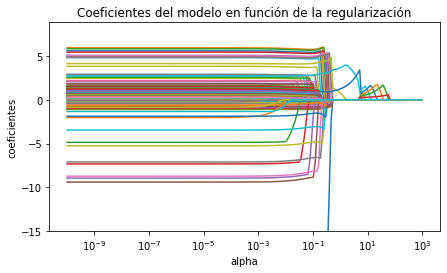

In [97]:
#Let see how the new alpha penalty the Lasso Model

alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, Y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

In [93]:
coef_=pd.DataFrame({"Predictors":X_train.columns, "coef":Lasso_ncv.coef_.flatten()})

LASSO=coef_[coef_["coef"]!=0]
print(LASSO)
# This results show how many predictors variables were taken by LASSO Regression using a high penalty (alpha=0.005)
# If the alpha were less than 0.005, so the results take all the predictors form the dataset
print(f"Number of parameters taken by LASSO Regression, {LASSO.shape}")

   Predictors       coef
0          V1  10.115632
8          V9  -8.712361
9         V10 -15.439898
10        V11 -13.925502
11        V12 -12.472525
12        V13 -11.125491
13        V14  -9.833484
14        V15  -8.733664
15        V16  -7.831291
16        V17  -7.127346
17        V18  -6.242133
18        V19  -5.451163
19        V20  -4.764216
20        V21  -3.972969
21        V22  -2.977855
22        V23  -2.082574
23        V24  -1.485242
24        V25  -1.164259
25        V26  -0.900578
26        V27  -0.256838
33        V34   0.862816
34        V35  24.145609
35        V36  24.559243
36        V37  26.018176
37        V38  26.119989
38        V39  23.491653
39        V40  17.433481
40        V41   7.797600
47        V48  -3.156622
48        V49 -23.671184
49        V50 -11.054211
50        V51  -4.464134
51        V52  -2.111150
52        V53  -0.277173
Number of parameters taken by LASSO Regression, (34, 2)


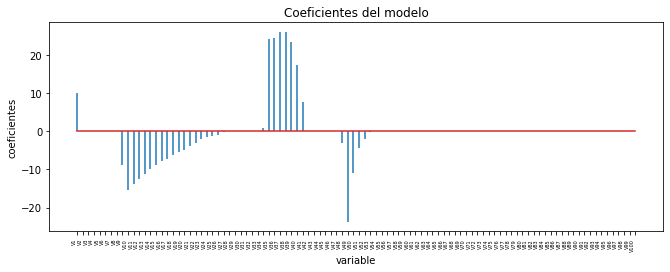

In [61]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(coef_.Predictors, coef_.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [64]:
prediction=Lasso_ncv.predict(X_test)
prediction=prediction.flatten()
prediction[:10]

array([34.74551517, 55.14441938, 36.95307616, 11.18053943, 15.10322335,
        6.30106633, 24.86098073,  7.46309521, 13.13794318, 18.22267952])

In [65]:
rmse_lasso=mean_squared_error(Y_test, prediction, squared=False)
rmse_lasso

rsquared_lasso=Lasso_ncv.score(X_test,Y_test)
print(f"the mean squared error from Lasso Regression is {rmse_lasso}")
print(f"the score from Lasso Regression is {rsquared_lasso}")

the mean squared error from Lasso Regression is 3.5474675066543235
the score from Lasso Regression is 0.9305776573781306


# Ridge Regression

In [66]:
modelo_ridge=RidgeCV(alphas=np.logspace(-10,2,200),
                     fit_intercept=True,
                     normalize=True,
                     store_cv_values=True
                    )

modelo_ridge_fit=modelo_ridge.fit(X_train,Y_train)

In [67]:
print(f"el mejor alpha encotrado para la regresion Ridge {modelo_ridge_fit.alpha_}")

el mejor alpha encotrado para la regresion Ridge 2.9673024081888725e-08


In [68]:
Ridge_ncv=Ridge(alpha=modelo_ridge_fit.alpha_, normalize=True)
Ridge_ncv.fit(X_train, Y_train)

Ridge(alpha=2.9673024081888725e-08, normalize=True)

(2.5118864315095823e-11,
 398.1071705534973,
 -17589.514891683746,
 19315.637083495727)

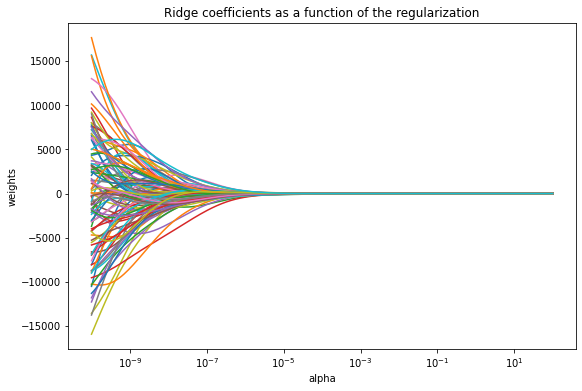

In [69]:
coefs = []
errors = []

alphas = np.logspace(-10,2, 200)

# Train the model with different regularisation strengths
for a in alphas:
    Ridge_ncv.set_params(alpha=a)
    Ridge_ncv.fit(X_train, Y_train)
    coefs.append(Ridge_ncv.coef_)

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

In [70]:
rigde_frame=pd.DataFrame({
    "predictors":X_train.columns,
    "coef":modelo_ridge.coef_.flatten()
})

rigde_frame

,predictors,coef
0,V1,1256.770356
1,V2,-681.801070
2,V3,-568.504974
3,V4,-598.870729
4,V5,-1023.083316
...,...,...
95,V96,-1054.878412
96,V97,-910.280296
97,V98,-558.510770
98,V99,44.378422


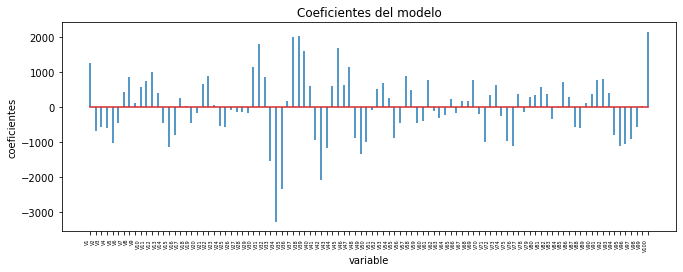

In [71]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(rigde_frame.predictors, rigde_frame.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [72]:
prediction_1=modelo_ridge.predict(X_test)
prediction_1=prediction_1.flatten()
prediction_1[:10]

array([43.14618168, 40.39693955, 51.81659479,  9.99905555, 17.8849567 ,
        7.64777599, 28.17638046,  8.2146242 , 14.71056183, 14.38270438])

In [73]:
rmse_ridge=mean_squared_error(Y_test, prediction_1, squared=False)

score_ridge=Ridge_ncv.score(X_test,Y_test)

print(f"the mean squared error from Ridge Regression is {rmse_ridge}")
print(f"the score from Ridge Regression is {score_ridge}")


the mean squared error from Ridge Regression is 2.4486445458351676
the score from Ridge Regression is 0.14399420844059097


# Elastic-Net Regression:

In [74]:
modelo=ElasticNetCV(alphas=np.logspace(-10,3,200), normalize=True, cv=10)
modelo.fit(X_train,Y_train)

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.656702325786682, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.178476679253436, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.292574891305776, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Converg

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643.7199441590411, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632.015106525604, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622.3811063081712, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Convergenc

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431.34112181808536, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429.21043962582115, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.19650585820966, tolerance: 2.13579197037037
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.80207165770844, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.56143921234252, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.17401702157258, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582.8589509568582, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 571.1314175436694, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561.2119087007486, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.12558678770586, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.58500977069843, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.14079043154226, tolerance: 2.1166975259259257
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.29595211508058, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.7447063960808, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.93427287733448, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627.833147250603, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616.4557297537185, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605.8638933902288, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.14713627732976, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416.3893065944372, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414.7349106988533, tolerance: 2.0425113037037033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.1232747935519, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.080781522579855, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.78599180882338, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612.0562124494193, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604.5011194488858, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596.5535895984502, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.0573721679612, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.7467589329779, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408.52519942031927, tolerance: 1.9773181925925924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.89063452404662, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.82713260587298, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250.00826956862602, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604.7165588964664, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 595.5643335866029, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586.425026630872, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Converg

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.4346745826714, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.7696642014563, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.2026608160771, tolerance: 2.095309081481482
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.29758303470771, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.39745092534577, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.14391458810678, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625.7632252536525, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614.101071039287, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603.0432315297705, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389.2480138038948, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.53611507437574, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383.96404575388567, tolerance: 2.0523569333333334
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.515957868819896, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.075196689442237, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.675638458442336, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696.0238303584181, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679.9292165604807, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 665.258616071394, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440.6706475999689, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438.0834972834922, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435.620138400603, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.183597573182, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.82348908579553, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.47397697212165, tolerance: 2.0193269333333332
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752.4129764077758, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.8893455262562, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 753.1826580842446, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.92873089589176, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448.99143116855436, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446.17082498776125, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.82683118994953, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.40563002843913, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.9972121305897, tolerance: 2.063188148148148
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979.6994986709128, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 892.6317793367309, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.5971533995275, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.096928340672, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.5517181698961, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483.09921867199466, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.128424174017, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.4758740257919, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.8571434233272, tolerance: 2.038410414814815
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Converg

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.87274733253, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063.2184482075695, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1066.0210661952297, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.2367738811586, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.1236459050694, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.1241985797063, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.18428312553897, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.67021471578084, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.178105705888, tolerance: 2.0143109925925926
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Erik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

ElasticNetCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.354286...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
             cv=10, normalize=True)

In [75]:
print(f"The best alpha found using Elastic Net regression is {modelo.alpha_}")

The best alpha found using Elastic Net regression is 6.080224261649427e-10


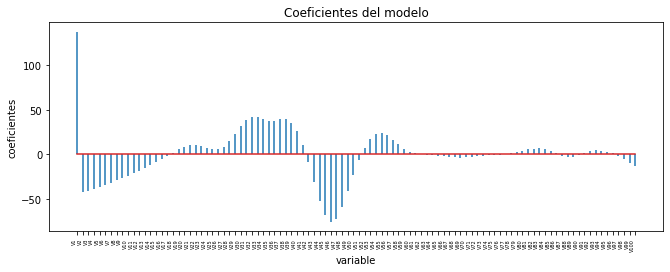

In [76]:
elastic_frame=pd.DataFrame({
    "predictores":X_train.columns,
    "coef":modelo.coef_
})

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(elastic_frame.predictores, elastic_frame.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [77]:
predictores=modelo.predict(X_test)
predictores[:10]

array([21.92828135, 57.15044041, 44.91257335, 11.16299364, 15.8769551 ,
        5.41737977, 25.66493096,  9.81313565, 13.52379405, 22.91333803])

In [78]:
rmse_elastic=mean_squared_error(Y_test, predictores, squared=False)
score_elastic=modelo.score(X_test,Y_test)
print(f"the mean squared error from elastic net is {rmse_elastic}")
print(f"the score from elastic net is {score_elastic}")

the mean squared error from elastic net is 5.2329373073974566
the score from elastic net is 0.848938610278291


# Conclusion:

In [79]:
df_comparation=pd.DataFrame({
    "Model":["OLS","OLS_log","OLS_skl","Lasso","Ridge","Elastic_Net"],
    "MSE":[MSE1,MSE2,rmse_ols,rmse_lasso,rmse_ridge,rmse_elastic]
})


df_comparation

,Model,MSE
0,OLS,0.789825
1,OLS_log,0.029050
2,OLS_skl,3.839668
3,Lasso,3.547468
4,Ridge,2.448645
5,Elastic_Net,5.232937


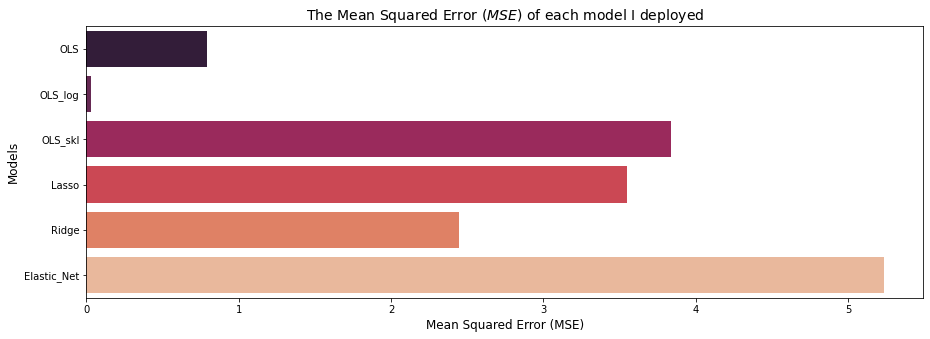

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(x="MSE",y="Model",data=df_comparation, palette="rocket")
plt.title("The Mean Squared Error (${MSE}$) of each model", fontsize=14)
plt.xlabel("Mean Squared Error (MSE)", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.show()

In [81]:
df_comparation_1=pd.DataFrame({
    "Model":["OLS","OLS_log","OLS_skl","Lasso","Ridge","Elastic_Net"],
    "Score":[R2_1,R2_2,socre_ols,rsquared_lasso,score_ridge,score_elastic]
})


In [82]:
df_comparation_1

,Model,Score
0,OLS,0.995111
1,OLS_log,0.954445
2,OLS_skl,0.918670
3,Lasso,0.930578
4,Ridge,0.143994
5,Elastic_Net,0.848939


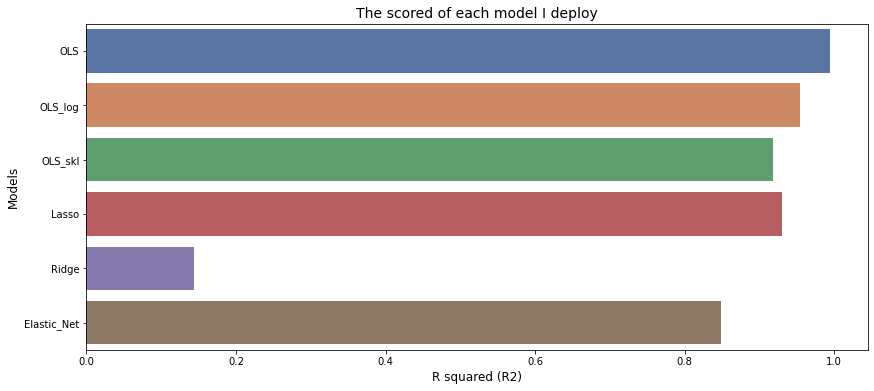

In [89]:
plt.figure(figsize=(14,6))
sns.barplot(x="Score",y="Model",data=df_comparation_1, palette="deep")
plt.title("The scored of each model", fontsize=14)
plt.xlabel("R squared (R2)", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.show()